In [2]:
###Audio Classification with Pre Procesisng step by step
##Trained with ANN and CNN -> part to change it
##Done on UrbanSound8K-> (4seconds each clip)

In [29]:
##ADA part -> what does sound look like? Librosa works with the sounds 
!pip install librosa
!pip3 install librosa

  Using cached https://files.pythonhosted.org/packages/ed/1b/72a1821152d07cf1d8b6fce298aeb06a7eb90f4d6d41acec9861e7cc6df0/decorator-4.4.2-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/31/9f/042db462417451e81035c3d43b722e88450c628a33dfda69777a801b0d40/scikit_learn-0.20.4-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/24/40/11b12af7f322c1e20446c037c47344d89bab4922b8859419d82cf56d796d/scipy-1.2.3-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/83/f2/938d6b0e6b0be158d7beb7cc6067243783d219e8e0a7474bbe69d0fb5472/numba-0.47.0-cp27-cp27mu-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/28/5c/cf6a2b65a321c4a209efcdf64c2689efae2cb62661f8f6f4bb28547cf1bf/joblib-0.14.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/3a/5f/47e578b3ae79e2624e205445ab77a1848acdaa2929a00eeef6b16eaaeb20/numpy-1.16.6-cp27-cp27mu-manylinux1_x86_64.whl
  

  Using cached charset_normalizer-2.0.12-py3-none-any.whl (39 kB)


In [1]:
!dir

PreProcessing.ipynb  pre_processing_ML.py  saved_models  UrbanSound8K


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
filename = 'UrbanSound8K/acord.wav'

In [4]:
##Display graph library 
import librosa 
import librosa.display
import IPython.display as ipd

/home/szy/.local/lib/python3.6/site-packages/numba/core/errors.py:154: UserWarning: Insufficiently recent colorama version found. Numba requires colorama >= 0.3.9
  warnings.warn(msg)


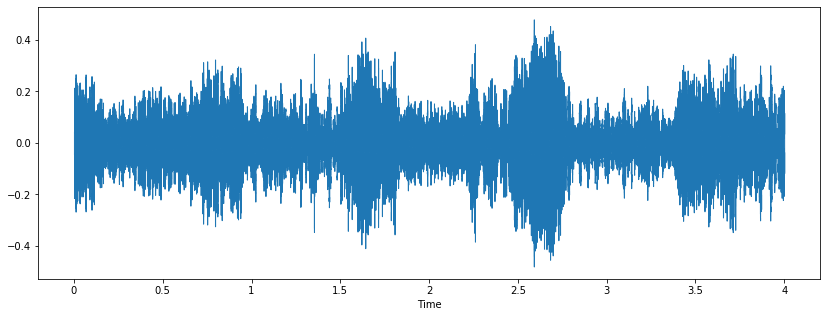

In [5]:
##Plot and play
plt.figure(figsize =(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data,sr=sample_rate)
ipd.Audio(filename)

In [6]:
sample_rate ## How many times per second it has been sampled -- 44.1 Khz is standard 
##There may be different samples rates in a single dataset --> mono equal LHS and RHS-> 
##Sterio is different in LHS and RHS
##Librosa normalizes this for a single sample rate 22.05Khz

22050

In [7]:
from scipy.io import wavfile as wav
wave_sample_rate, wave_audio = wav.read(filename)

In [8]:
wave_sample_rate ## THIS IS THE ACTUAL ONE BUT LIBROSA NORMALIZES

44100

In [9]:
wave_audio

array([[ 1898,  -842],
       [ 1862,  -884],
       [ 1870,  -780],
       ...,
       [-3234, -3785],
       [-3314, -3983],
       [-3376, -4283]], dtype=int16)

In [10]:
!pip install pandas
!pip3 install pandas
import pandas as pd

Defaulting to user installation because normal site-packages is not writeable
Defaulting to user installation because normal site-packages is not writeable


In [11]:
metadata = pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head(10)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
5,100263-2-0-143.wav,100263,71.500000,75.500000,1,5,2,children_playing
6,100263-2-0-161.wav,100263,80.500000,84.500000,1,5,2,children_playing
7,100263-2-0-3.wav,100263,1.500000,5.500000,1,5,2,children_playing
8,100263-2-0-36.wav,100263,18.000000,22.000000,1,5,2,children_playing
9,100648-1-0-0.wav,100648,4.823402,5.471927,2,10,1,car_horn


In [74]:
##fold == which folder 
##classid 3 == dogbark

In [12]:
##Want to find out if it is a balanced dataset or not
metadata['class'].value_counts()
##Most are but some are less

engine_idling       1000
jackhammer          1000
street_music        1000
children_playing    1000
drilling            1000
dog_bark            1000
air_conditioner     1000
siren                929
car_horn             429
gun_shot             374
Name: class, dtype: int64

In [78]:
##ADA DONE##############
##NOW WE MOVE ONTO THE PRE PROCESSING#######################

In [81]:
print(data) ## THIS IS MONO
print(wave_audio)##THIS IS STERIO

[ 0.01117232  0.01807125  0.01534632 ... -0.08723455 -0.10228398
 -0.11784094]
[[ 1898  -842]
 [ 1862  -884]
 [ 1870  -780]
 ...
 [-3234 -3785]
 [-3314 -3983]
 [-3376 -4283]]


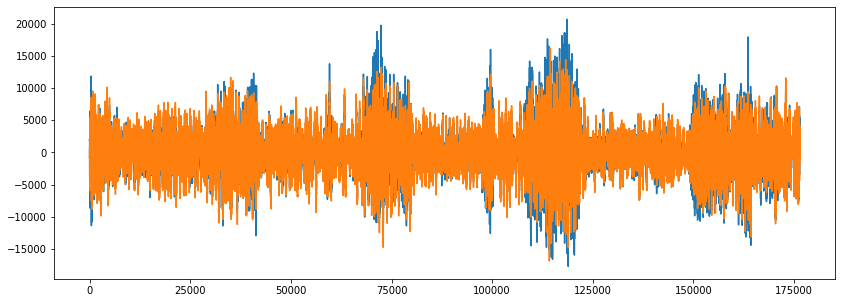

In [13]:
plt.figure(figsize =(14,5))
plt.plot(wave_audio)

In [ ]:
##CREATE INDEPENDENT FEATURES

In [14]:
mfccs = librosa.feature.mfcc(y = data, sr=sample_rate,  n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [15]:
import os

audio_dataset_path='UrbanSound8K/audio/'
metadata=pd.read_csv('UrbanSound8K/metadata/UrbanSound8K.csv')
metadata.head()

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.0,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.5,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.5,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.0,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.5,72.500000,1,5,2,children_playing


In [17]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    
    return mfccs_scaled_features

In [18]:
import numpy as np
from tqdm import tqdm
### Now we iterate through every audio file and extract features 
### using Mel-Frequency Cepstral Coefficients
extracted_features=[]
for index_num,row in tqdm(metadata.iterrows()):
    file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
    final_class_labels=row["class"] ## Get the label with mfcc
    data=features_extractor(file_name) ## get mfcc
    extracted_features.append([data,final_class_labels]) ##Store in a long list

3555it [03:43, 17.87it/s]/home/szy/.local/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8325it [08:28, 21.08it/s]/home/szy/.local/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/home/szy/.local/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [08:51, 16.42it/s]


In [21]:
### converting extracted_features to Pandas dataframe
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [20]:
### Split the dataset into independent and dependent dataset
X=np.array(extracted_features_df['feature'].tolist()) ##MFCC features
y=np.array(extracted_features_df['class'].tolist()) ##classes

In [219]:
X.shape

(8732, 40)

In [220]:
y.shape

(8732,)

In [221]:
#!pip install tensorflow 
#!pip3 install tensorflow
### Label Encoding
###y=np.array(pd.get_dummies(y))
### Label Encoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
y=to_categorical(labelencoder.fit_transform(y))

In [222]:
y
y.shape

(8732, 10)

In [223]:
### Train Test Split
from sklearn.model_selection import train_test_split0
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [224]:
X_train

array([[-1.3211458e+02,  1.1391494e+02, -2.3927406e+01, ...,
         3.3260243e+00, -1.4790288e+00,  2.8912868e+00],
       [-1.4296139e+01,  9.1951004e+01, -8.6025953e+00, ...,
        -3.3708370e+00, -5.2008624e+00, -1.5975088e+00],
       [-4.9827816e+01,  1.8449348e-01, -2.0364500e+01, ...,
         2.0259936e+00, -8.3159244e-01,  2.7930872e+00],
       ...,
       [-4.2723691e+02,  9.2938087e+01,  2.8287873e+00, ...,
         8.1411374e-01,  6.6066742e-01,  7.8365982e-01],
       [-1.4640692e+02,  1.3716916e+02, -3.4362492e+01, ...,
         1.3839476e+00, -1.9667517e+00, -8.8792092e-01],
       [-4.2171307e+02,  2.1160454e+02,  2.5852380e+00, ...,
        -5.1338639e+00, -3.6135261e+00, -1.3413876e+00]], dtype=float32)

In [225]:
y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [227]:
X_train.shape

(6985, 40)

In [119]:
X_test.shape

(1747, 40)

In [120]:
y_train.shape

(6985, 10)

In [122]:
y_test.shape

(1747, 10)

In [ ]:
##PREPROCESSING DONE### NOW WE WANT TO MAKE THE MODEL

In [124]:
import tensorflow as tf
print(tf.__version__)

2.6.2


In [125]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [137]:
### No of classes
num_labels=y.shape[1]

In [127]:
##MODEL##
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,))) ## (n_mfcc,)
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [136]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               4100      
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               20200     
_________________________________________________________________
activation_1 (Activation)    (None, 200)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               2

In [23]:
#model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')
!pip install espnet

Defaulting to user installation because normal site-packages is not writeable


In [130]:
## Trianing my model
from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime 

num_epochs = 100
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/audio_classification.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/100
219/219 [==============================] - 1s 2ms/step - loss: 9.7697 - accuracy: 0.1181 - val_loss: 2.2931 - val_accuracy: 0.1196

Epoch 00001: val_loss improved from inf to 2.29314, saving model to saved_models/audio_classification.hdf5
Epoch 2/100
219/219 [==============================] - 0s 2ms/step - loss: 2.5205 - accuracy: 0.1197 - val_loss: 2.2809 - val_accuracy: 0.1156

Epoch 00002: val_loss improved from 2.29314 to 2.28091, saving model to saved_models/audio_classification.hdf5
Epoch 3/100
219/219 [==============================] - 0s 1ms/step - loss: 2.3331 - accuracy: 0.1152 - val_loss: 2.2660 - val_accuracy: 0.1271

Epoch 00003: val_loss improved from 2.28091 to 2.26604, saving model to saved_models/audio_classification.hdf5
Epoch 4/100
219/219 [==============================] - 0s 2ms/step - loss: 2.2811 - accuracy: 0.1177 - val_loss: 2.2355 - val_accuracy: 0.1380

Epoch 00004: val_loss improved from 2.26604 to 2.23553, saving model to saved_models/audio_clas


Epoch 00033: val_loss did not improve from 1.07537
Epoch 34/100
219/219 [==============================] - 0s 1ms/step - loss: 1.2909 - accuracy: 0.5578 - val_loss: 1.0998 - val_accuracy: 0.6531

Epoch 00034: val_loss did not improve from 1.07537
Epoch 35/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2429 - accuracy: 0.5731 - val_loss: 1.0605 - val_accuracy: 0.6531

Epoch 00035: val_loss improved from 1.07537 to 1.06047, saving model to saved_models/audio_classification.hdf5
Epoch 36/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2372 - accuracy: 0.5777 - val_loss: 1.0421 - val_accuracy: 0.6617

Epoch 00036: val_loss improved from 1.06047 to 1.04211, saving model to saved_models/audio_classification.hdf5
Epoch 37/100
219/219 [==============================] - 0s 2ms/step - loss: 1.2195 - accuracy: 0.5777 - val_loss: 1.0427 - val_accuracy: 0.6611

Epoch 00037: val_loss did not improve from 1.04211
Epoch 38/100
219/219 [======================

219/219 [==============================] - 0s 1ms/step - loss: 1.0266 - accuracy: 0.6628 - val_loss: 0.8715 - val_accuracy: 0.7344

Epoch 00071: val_loss did not improve from 0.84393
Epoch 72/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0250 - accuracy: 0.6604 - val_loss: 0.8439 - val_accuracy: 0.7396

Epoch 00072: val_loss improved from 0.84393 to 0.84390, saving model to saved_models/audio_classification.hdf5
Epoch 73/100
219/219 [==============================] - 0s 1ms/step - loss: 0.9947 - accuracy: 0.6663 - val_loss: 0.8252 - val_accuracy: 0.7459

Epoch 00073: val_loss improved from 0.84390 to 0.82520, saving model to saved_models/audio_classification.hdf5
Epoch 74/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0155 - accuracy: 0.6620 - val_loss: 0.8523 - val_accuracy: 0.7384

Epoch 00074: val_loss did not improve from 0.82520
Epoch 75/100
219/219 [==============================] - 0s 1ms/step - loss: 1.0095 - accuracy: 0.6651 - val_l

In [228]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.7521465420722961


In [229]:
file_name
mfccs_features_pred = librosa.feature.mfcc(y=data, sr=sample_rate, n_mfcc=40)
prediction_feat = np.mean(mfccs_features_pred.T,axis=0)
model.predict(prediction_feat.reshape(1,-1))

array([[0.11668561, 0.02273892, 0.11872515, 0.08204152, 0.01755645,
        0.44369352, 0.01367685, 0.00993255, 0.03485312, 0.14009623]],
      dtype=float32)

In [230]:
print(metadata['class'].unique())
X_test[1]

['dog_bark' 'children_playing' 'car_horn' 'air_conditioner' 'street_music'
 'gun_shot' 'siren' 'engine_idling' 'jackhammer' 'drilling']


array([-466.47327   ,    1.501666  ,  -34.400043  ,   35.6894    ,
        -15.182924  ,  -18.883924  ,   -0.75772923,  -16.02822   ,
        -21.365473  ,    7.6201305 ,  -29.034496  ,  -19.153774  ,
         -2.6873193 ,   -8.493191  ,  -14.771136  ,   -7.028892  ,
         -7.116945  ,    8.868939  ,   14.91199   ,   21.457466  ,
         21.327414  ,    0.8871628 ,  -18.810377  ,   -5.0179625 ,
         -0.7058593 ,    2.9008534 ,   -6.7110267 ,  -16.649858  ,
         -9.8316965 ,   12.847431  ,    0.6619251 ,  -23.943693  ,
        -15.194155  ,    9.193657  ,   10.399715  ,   -0.5999181 ,
         -1.2594261 ,   17.706207  ,   13.831076  ,   -5.1632876 ],
      dtype=float32)

In [173]:
model.predict(X_test)

array([[3.9695273e-03, 1.1028805e-03, 9.4748475e-03, ..., 4.7937381e-05,
        1.2688412e-03, 1.6410405e-02],
       [1.8679767e-10, 2.0978260e-03, 2.2637946e-04, ..., 6.4998289e-13,
        8.3366649e-05, 1.6349482e-03],
       [5.2325813e-12, 9.5206522e-04, 1.9975609e-07, ..., 2.8298107e-05,
        1.8755991e-07, 3.2871350e-04],
       ...,
       [3.1194585e-08, 8.2574558e-01, 1.1067762e-06, ..., 2.6237331e-08,
        2.5404097e-05, 1.7083718e-01],
       [3.9482057e-01, 9.3980646e-03, 1.6633753e-01, ..., 2.4373354e-02,
        9.0512428e-03, 2.5713950e-01],
       [1.3047783e-01, 1.2373943e-02, 3.1737235e-01, ..., 8.1091681e-03,
        6.9999479e-02, 1.4925511e-01]], dtype=float32)

In [174]:
##MODEL DONE## TIME OT CHECK IF WE CAN GET THE ACCURACY UP WITH CNN's AND TEST 

In [238]:
file_name="UrbanSound8K/acord.wav"
audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)



print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
mfccs_scaled_features=mfccs_scaled_features.reshape(1,-1)
print(mfccs_scaled_features)
print(mfccs_scaled_features.shape)
predicted_label=model.predict(mfccs_scaled_features)

index_max = [np.argmax(predicted_label[0])]
print(index_max)
print(predicted_label)
prediction_class = labelencoder.inverse_transform(index_max) 
prediction_class

[-200.06895     133.2812      -11.147846     44.516357      4.864973
   37.689228    -10.853884      2.2236826    -7.9140816    12.697572
   -2.5518258    19.290127      0.9056516    14.77887      -1.2477381
   10.992367     -2.045448      1.8477345    -4.658494      5.4965405
   -2.1519725     2.5721414    -0.39570183    3.3702416     1.4429462
    1.3595328     1.1116714     2.0582123    -2.5192127    -1.3637222
    0.4809976     1.0599517     0.6250947    -4.457968     -3.5855925
   -2.814347      1.4632263    -5.080375     -2.087301     -1.1157299 ]
(40,)
[[-200.06895     133.2812      -11.147846     44.516357      4.864973
    37.689228    -10.853884      2.2236826    -7.9140816    12.697572
    -2.5518258    19.290127      0.9056516    14.77887      -1.2477381
    10.992367     -2.045448      1.8477345    -4.658494      5.4965405
    -2.1519725     2.5721414    -0.39570183    3.3702416     1.4429462
     1.3595328     1.1116714     2.0582123    -2.5192127    -1.3637222
     0.480

array(['children_playing'], dtype='<U16')

In [24]:
##################################################################################################################

In [28]:
from espnet.nets.pytorch_backend.e2e_asr import E2E

In [29]:
def audio_data(filename, print_graphs = False):
    ##Plot and play
    data, sample_rate = librosa.load(filename)    
    if print_graphs:
        plt.figure(figsize =(14,5))
        librosa.display.waveshow(data,sr=sample_rate)
        ipd.Audio(filename)
    return data, sample_rate

In [102]:
import numpy as np     
import librosa
import matplotlib.pyplot as plt
import librosa.display
import IPython.display as ipd
import os
import pandas as pd
from tqdm import tqdm
from scipy.spatial import distance
from scipy import spatial
#https://librosa.org/doc/main/generated/librosa.util.frame.html

In [31]:
def window_split(frame_len, hop_len,data, print_frame = False):
    frames = librosa.util.frame(data, frame_length=frame_len, hop_length=hop_len)
    windowed_frames = np.hanning(frame_len).reshape(-1, 1) * frames
    sum_len=0
    if print_frame:
        # Print frames
        for i, frame in enumerate(frames):
            print("Frame {}: {}".format(i, frame))
            print("Length of frame :{}".format(len(frame)))
            sum_len+=len(frame)
        print("All frames :{}".format(sum_len))
        print("More data than original size: {}".format(len(frames) <= sum_len))
        # Print windowed frames
        for i, frame in enumerate(windowed_frames):
            print("Win Frame {}: {}".format(i, np.round(frame, 3)))
        
    return frames,windowed_frames

In [21]:
x = np.arange(0, 128)
print (x)
frame_len, hop_len = 16, 1
frames = librosa.util.frame(x, frame_length=frame_len, hop_length=hop_len)
windowed_frames = np.hanning(frame_len).reshape(-1, 1) * frames

# Print frames
#for i, frame in enumerate(frames):
#    print("Frame {}: {}".format(i, frame))
#    print("Length of frame :{}".format(len(frame)))

# Print windowed frames
#for i, frame in enumerate(windowed_frames):
#    print("Win Frame {}: {}".format(i, np.round(frame, 3)))

#print(frames[1])
#print(len(frames[1]))
#print(windowed_frames[2])
#print(len(windowed_frames[2]))
    


[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127]


In [25]:
filename = 'UrbanSound8K/acord.wav'
data, sample_rate = audio_data(filename)
print(data.shape)
## What should appropriate frame lengths be?
## Frame len here should be the length of the INPUT FILE
## Hop distance is engineering

frame_len, hop_len = 16, 1
frm, wd = window_split(frame_len, hop_len,data)
print(frm[0])
print(len(frm))
print(wd[0])
print(len(wd))

(88200,)
[0.01117232 0.01807125 0.01534632 ... 0.06179424 0.05947506 0.0354091 ]
16
[0. 0. 0. ... 0. 0. 0.]
16


In [32]:
def mfcc_form(data,sample_rate,n_mfcc,metadata_path):
    mfccs = librosa.feature.mfcc(y = data, sr=sample_rate,  n_mfcc=40)
    metadata=pd.read_csv(metadata_path)
    metadata.head()
    return metadata

In [33]:
n_mfcc = 40
metadata_path = 'UrbanSound8K/metadata/UrbanSound8K.csv'
mfcc_form(data,sample_rate,n_mfcc,metadata_path)

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


In [34]:
def features_extractor(file):
    audio, sample_rate = librosa.load(file, res_type='kaiser_fast') 
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
    mfccs_scaled_features = np.mean(mfccs_features.T,axis=0)
    return mfccs_scaled_features

In [35]:
def itterate_over_all_files_windowed(audio_dataset_path,frame_len, hop_len,data,metadata):
    extracted_features=[]
    extracted_windows =[]
    aduio_sample_index = 0
    for index_num,row in tqdm(metadata.iterrows()):
        file_name = os.path.join(os.path.abspath(audio_dataset_path),'fold'+str(row["fold"])+'/',str(row["slice_file_name"]))
        final_class_labels=row["class"] ## Get the label with mfcc
        data_mfcc=features_extractor(file_name)
        frames,windowed_frames = window_split(frame_len, hop_len,data_mfcc)
        extracted_features.append([data_mfcc,final_class_labels]) ##Store in a long list
        for frame in frames:
            extracted_windows.append([frame,final_class_labels,aduio_sample_index]) ##Store in a long list
        aduio_sample_index+=1
    return extracted_features, extracted_windows


In [36]:
filename = 'UrbanSound8K/acord.wav'
audio_dataset_path = 'UrbanSound8K/audio/'
metadata_path = 'UrbanSound8K/metadata/UrbanSound8K.csv'
metadata = pd.read_csv(metadata_path)

data, sample_rate = audio_data(filename)
frame_len = 16 #This will be length of input
hop_len = 1 #To make a single value sliding window
extracted_features, extracted_windows = itterate_over_all_files_windowed(audio_dataset_path,frame_len,hop_len,data,metadata)

3553it [02:27, 23.81it/s]/home/szy/.local/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1323
  return f(*args, **kwargs)
8323it [05:37, 34.16it/s]/home/szy/.local/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1103
  return f(*args, **kwargs)
/home/szy/.local/lib/python3.6/site-packages/librosa/util/decorators.py:88: UserWarning: n_fft=2048 is too small for input signal of length=1523
  return f(*args, **kwargs)
8732it [05:53, 24.70it/s]


In [37]:
extracted_features_df=pd.DataFrame(extracted_features,columns=['feature','class'])
extracted_features_df.head()

,feature,class
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing


In [38]:
extracted_windows_df=pd.DataFrame(extracted_windows_df,columns=['feature','class','Sample'])
extracted_windows_df.head()

,feature,class,Sample
0,"[-218.18938, 71.38549, -131.49442, -52.25892, ...",dog_bark,NaN
1,"[-425.05234, 110.67095, -54.192833, 62.045414,...",children_playing,NaN
2,"[-459.82623, 122.82864, -47.908062, 53.302677,...",children_playing,NaN
3,"[-414.82184, 102.94826, -36.65685, 54.170742, ...",children_playing,NaN
4,"[-447.60776, 115.08627, -53.74607, 61.55309, 1...",children_playing,NaN


In [23]:
print(extracted_features[0])
print(extracted_windows[0])
print(extracted_windows[100])

[array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258919e+01,
       -2.2106579e+01, -2.1909658e+01, -1.1460048e+01,  1.8722717e+01,
        6.4100847e+00,  1.4377756e+01, -1.2035481e+01,  1.9690273e+00,
       -1.7309101e+01,  9.7747097e+00, -5.8458338e+00, -1.5289919e+00,
       -1.7429775e+01,  1.0425417e+00, -4.1709461e+00,  7.3335233e+00,
       -1.1701521e+01, -7.4281230e+00,  5.4550538e+00, -2.9434776e+00,
       -5.9815216e+00, -2.3365991e-01, -3.4048657e+00,  4.3616667e+00,
       -6.0568337e+00, -5.6260591e+00,  1.0876640e+00,  6.8657203e+00,
       -2.0219426e-01,  1.6815265e+00, -5.6556258e+00, -2.8866239e+00,
        3.0454190e+00, -1.5696381e+00, -7.5472158e-01,  5.3398448e-01],
      dtype=float32), 'dog_bark']
[array([-218.18938  ,   71.38549  , -131.49442  ,  -52.25892  ,
        -22.106579 ,  -21.909658 ,  -11.460048 ,   18.722717 ,
          6.4100847,   14.377756 ,  -12.035481 ,    1.9690273,
        -17.309101 ,    9.77471  ,   -5.845834 ,   -1.5289919,
 

In [49]:
###############Lets try an input with doing it all together#####
input_audio = 'UrbanSound8K/siren_1.wav'
input_audio_2 = 'UrbanSound8K/acord_2.wav'
compared_to = 'UrbanSound8K/acord.wav'

In [50]:
input_mfcc = features_extractor(input_audio)
input_mfcc_2 = features_extractor(input_audio_2)
compared_mfcc = features_extractor(compared_to)
print(len(input_mfcc))
print(len(compared_mfcc))

40
40


In [93]:
threshold = 65 

In [44]:
print(np.linalg.norm(input_mfcc-compared_mfcc))

122.190216


In [51]:
print(np.linalg.norm(input_mfcc_2-compared_mfcc))

28.393139


In [106]:
def get_threshhold_from_mean(extracted_features,label,input_mfcc,cos = False):
    thresh_list = list()
    for i in range(len(extracted_features)):
        if cos:
            if extracted_features[i][1] == label:
                cos_sim = spatial.distance.cosine(extracted_features[i][0],input_mfcc)
                thresh_list.append(cos_sim)
        else:
            if extracted_features[i][1] == label:
                MSD = spatial.distance.euclidean(extracted_features[i][0],input_mfcc)
                thresh_list.append(MSD)
    return np.mean(thresh_list)
                
        

In [113]:
#find all sirens
threshold = get_threshhold_from_mean(extracted_features, 'siren', input_mfcc, True)
predictions = list()
for i in range(len(extracted_features)):
    MSD = spatial.distance.cosine(extracted_features[i][0],input_mfcc)
    if (MSD <= threshold):
        predictions.append([extracted_features[i][1],i])

In [121]:
print(predictions[0])

['street_music', 94]


In [120]:
print(len(predictions))
extracted_features[0]

3337


[array([-2.1818938e+02,  7.1385490e+01, -1.3149442e+02, -5.2258919e+01,
        -2.2106579e+01, -2.1909658e+01, -1.1460048e+01,  1.8722717e+01,
         6.4100847e+00,  1.4377756e+01, -1.2035481e+01,  1.9690273e+00,
        -1.7309101e+01,  9.7747097e+00, -5.8458338e+00, -1.5289919e+00,
        -1.7429775e+01,  1.0425417e+00, -4.1709461e+00,  7.3335233e+00,
        -1.1701521e+01, -7.4281230e+00,  5.4550538e+00, -2.9434776e+00,
        -5.9815216e+00, -2.3365991e-01, -3.4048657e+00,  4.3616667e+00,
        -6.0568337e+00, -5.6260591e+00,  1.0876640e+00,  6.8657203e+00,
        -2.0219426e-01,  1.6815265e+00, -5.6556258e+00, -2.8866239e+00,
         3.0454190e+00, -1.5696381e+00, -7.5472158e-01,  5.3398448e-01],
       dtype=float32),
 'dog_bark']

In [130]:
def get_FN_and_TN(predictions,extracted_features,label):
    FN = 0
    TN = 0 
    indexes = list()
    for i in range(len(predictions)):
        indexes.append(predictions[i][1])
    
    for i in range(len(extracted_features)):
        if extracted_features[i][1] == label and i not in indexes:
            FN +=1
        elif extracted_features[i][1] != label and i not in indexes:
            TN +=1
        
    return FN,TN

In [136]:
def get_accuracy(predictions,extracted_features, label):
    TP = 0
    FP = 0
    FN,TN = get_FN_and_TN(extracted_features,predictions,label)
    not_predicted = len(extracted_features) - len(predictions)
    for i in predictions:
        if i[0] == label:
            TP +=1
        elif i[0] != label:
            FP +=1
    accuracy = (TN+TP)/(TP+FP+TN+FN)
    return accuracy*100

In [137]:
accuracy = get_accuracy(predictions,extracted_features,'siren')
print(accuracy)

57.76146239136949
